In [80]:
import matplotlib.pyplot as plt

In [110]:
# Se declaran las variables a utilizar en el modelo.

# Los susceptibles son el 97% de la población iniicialmente.
S = 0.97

# Los infectados inicialmente son el 3% de la población inicialmente.
I = 0.03

# Los recuperados son 0 inicialmente.
R = 0

# Tasa de transmisión beta.
beta = 0.13

# Tasa de recuperación gamma.
gamma = 0.043

# Tiempo a simular = 100 días.
tiempo = 150

# Capacidad máxima del sistema de salud = 30%.
sistemaSaludMax = 0.3

In [111]:
# Funcionaes que definen al modelo SIR.
# Devuelven el nuevo valor para cada población y no su incremento/decremento.
def modeloSIRSusceptibles(susceptibles, infectados):
    return susceptibles - beta * susceptibles * infectados

def modeloSIRInfectados(susceptibles, infectados):
    return infectados + beta * susceptibles * infectados - gamma * infectados

def modeloSIRRecuperados(recuperados, infectados):
    return recuperados + gamma * infectados

In [112]:
# Realizo la simulación de la pandemia.
susceptibles = [ S ]
infectados = [ I ]
recuperados = [ R ]
sistemaDeSalud = [ sistemaSaludMax ]


for i in range(1, tiempo):
    S = modeloSIRSusceptibles(S, I)
    susceptibles.append(S)
        
    I = modeloSIRInfectados(S, I)
    infectados.append(I)
    
    R = modeloSIRRecuperados(R, I)
    recuperados.append(R)
    
    sistemaDeSalud.append(sistemaSaludMax)

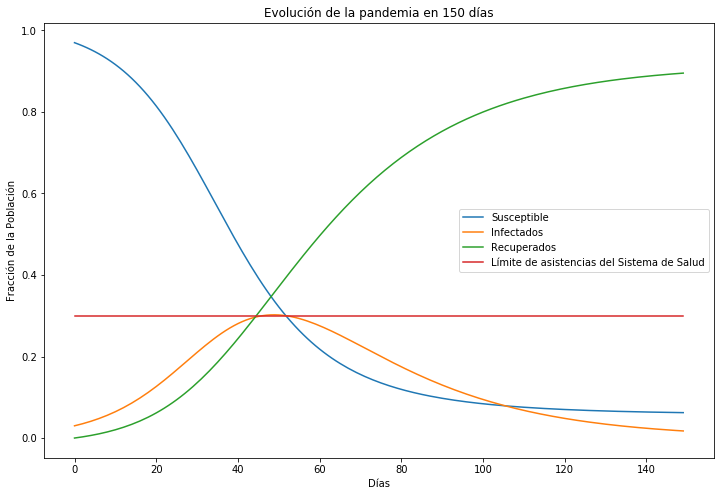

In [113]:
plt.figure(figsize=(12, 8))
plt.title('Evolución de la pandemia en 150 días')
plt.plot(susceptibles)
plt.plot(infectados)
plt.plot(recuperados)
plt.plot(sistemaDeSalud)
#plt.axhline(y=0.3, color='r', linestyle='-')
plt.legend(['Susceptible', 'Infectados', 'Recuperados', 'Límite de asistencias del Sistema de Salud'])
plt.xlabel('Días')
plt.ylabel('Fracción de la Población')
plt.show()